
Model: Logistic Regression (penalty=l1, C=0.01)
F1-score (zbiór treningowy): 0.5464
F1-score (zbiór testowy): 0.5773


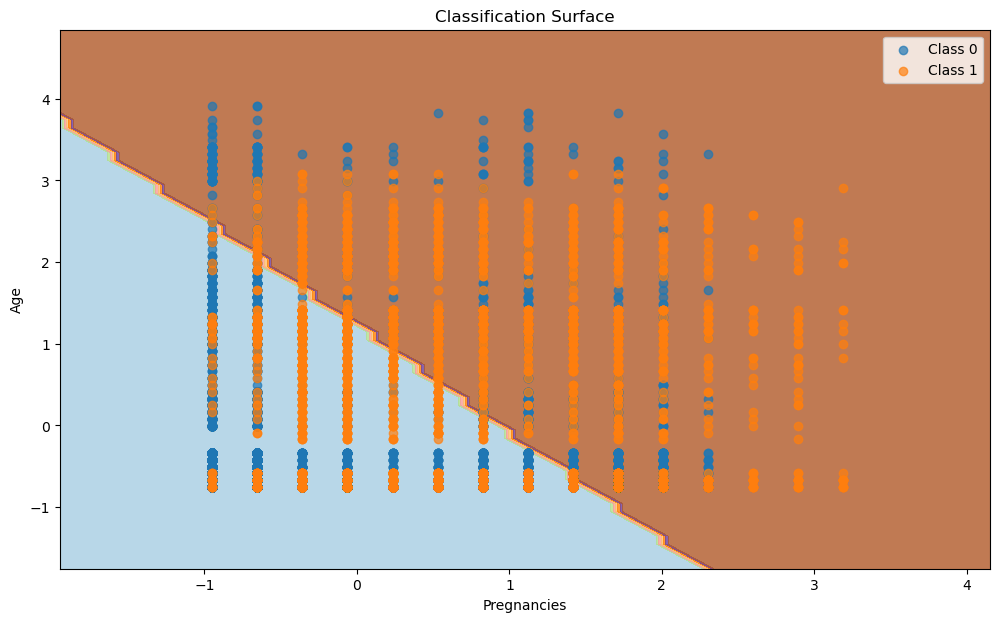


Model: Logistic Regression (penalty=l1, C=0.1)
F1-score (zbiór treningowy): 0.5469
F1-score (zbiór testowy): 0.5809


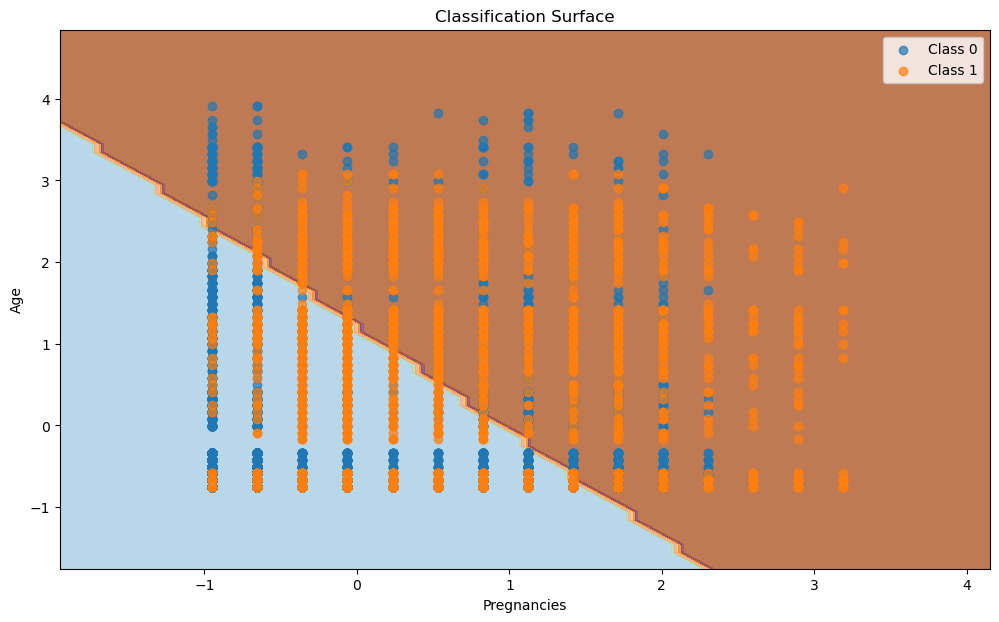


Model: Logistic Regression (penalty=l1, C=1)
F1-score (zbiór treningowy): 0.5469
F1-score (zbiór testowy): 0.5809


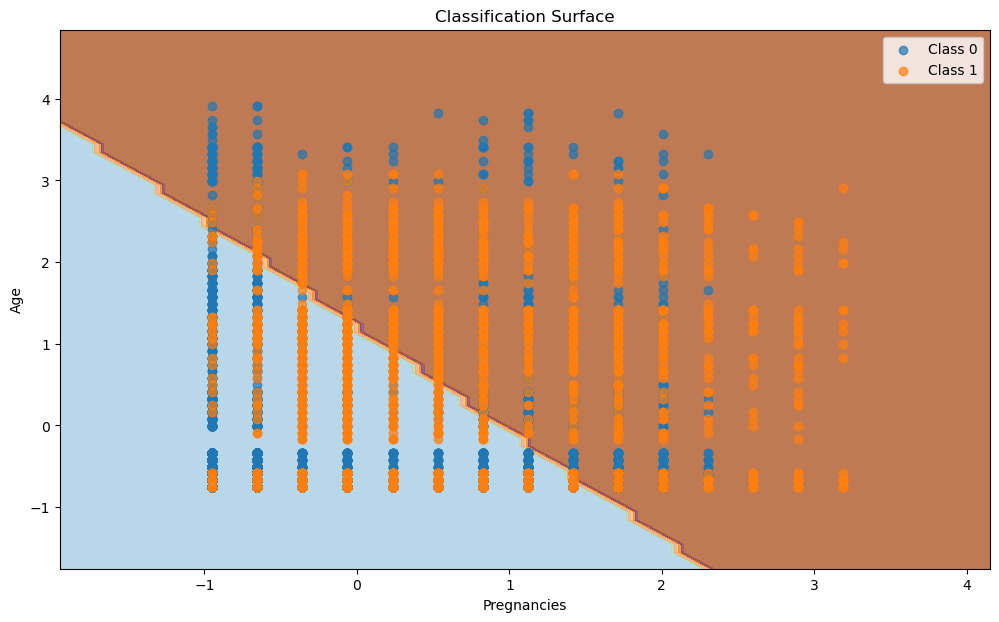


Model: Logistic Regression (penalty=l1, C=10)
F1-score (zbiór treningowy): 0.5469
F1-score (zbiór testowy): 0.5809


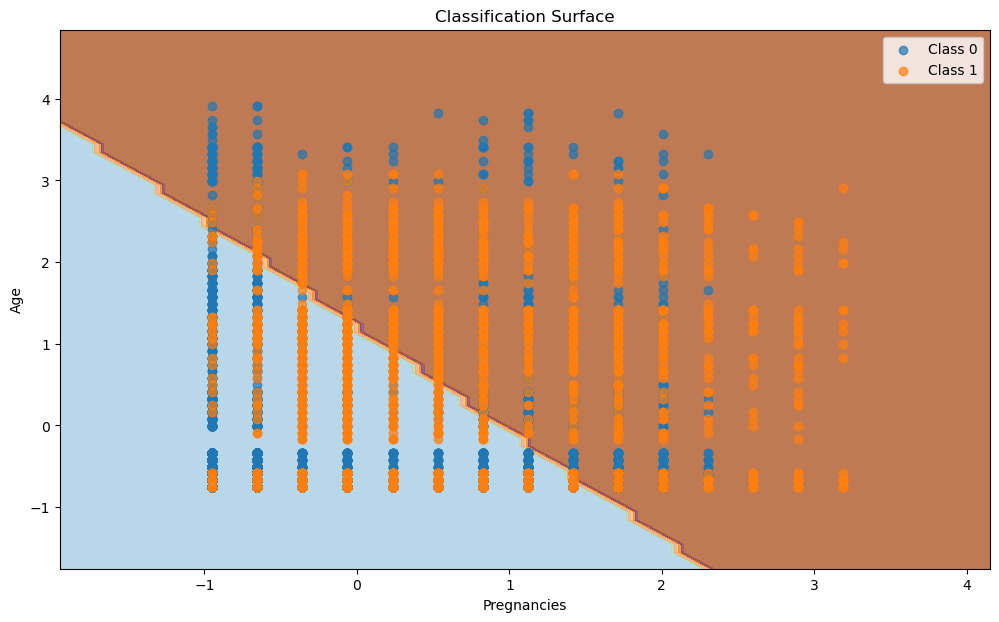


Model: Logistic Regression (penalty=l2, C=0.01)
F1-score (zbiór treningowy): 0.5469
F1-score (zbiór testowy): 0.5809


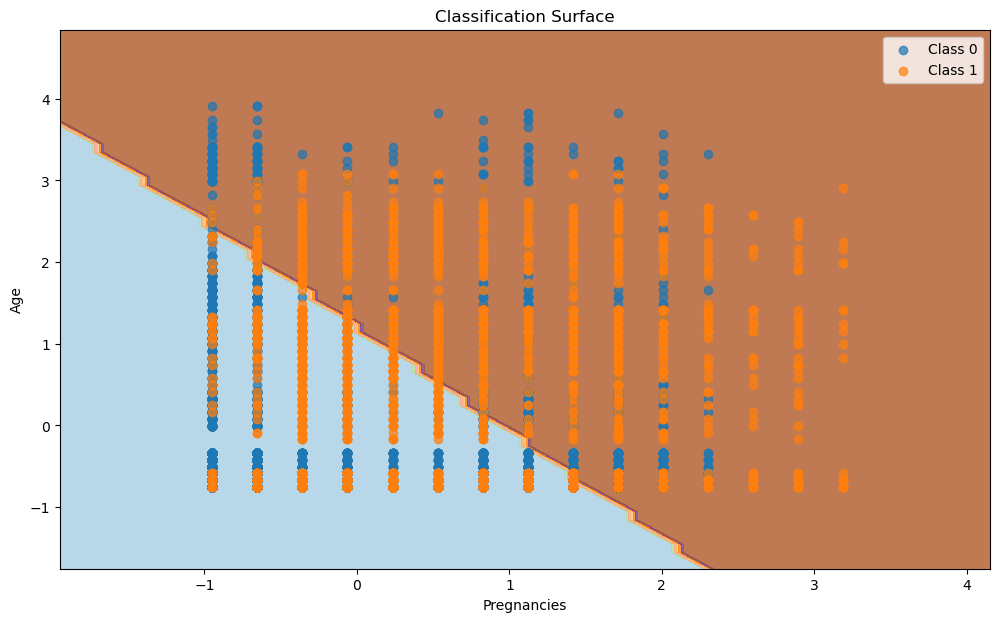


Model: Logistic Regression (penalty=l2, C=0.1)
F1-score (zbiór treningowy): 0.5469
F1-score (zbiór testowy): 0.5809


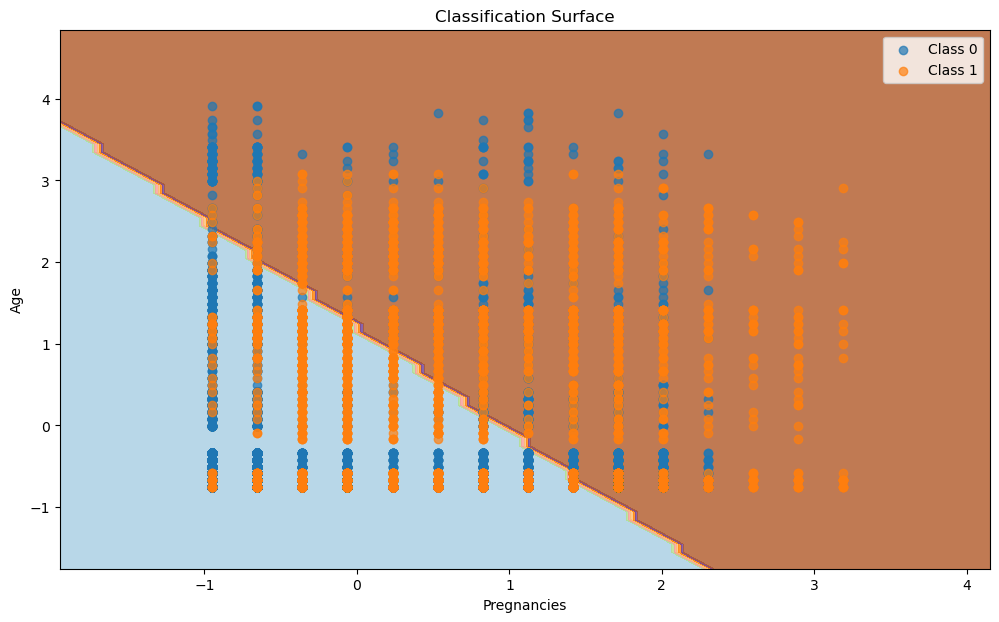


Model: Logistic Regression (penalty=l2, C=1)
F1-score (zbiór treningowy): 0.5469
F1-score (zbiór testowy): 0.5809


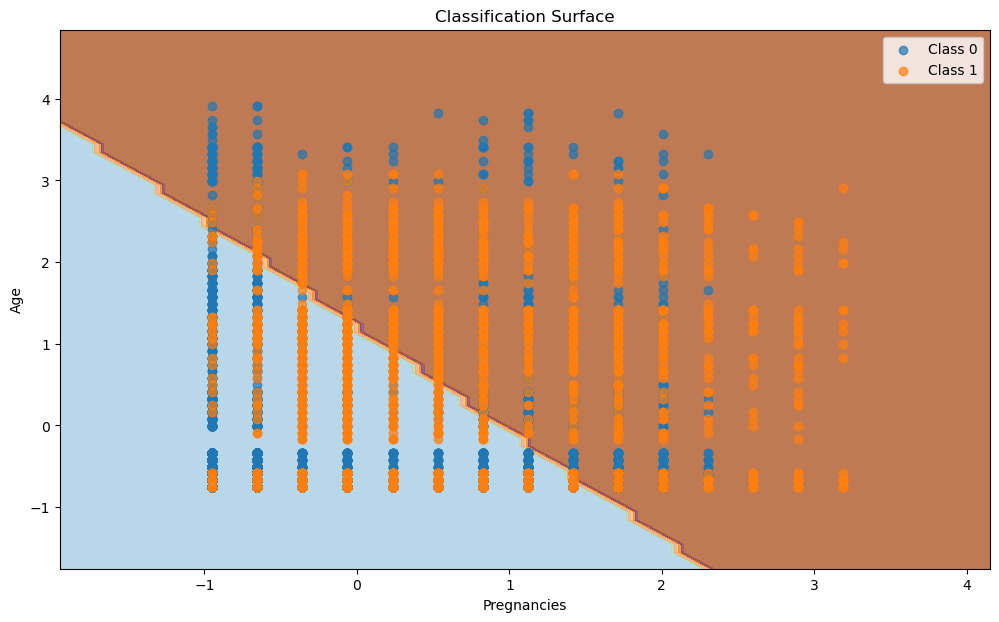


Model: Logistic Regression (penalty=l2, C=10)
F1-score (zbiór treningowy): 0.5469
F1-score (zbiór testowy): 0.5809


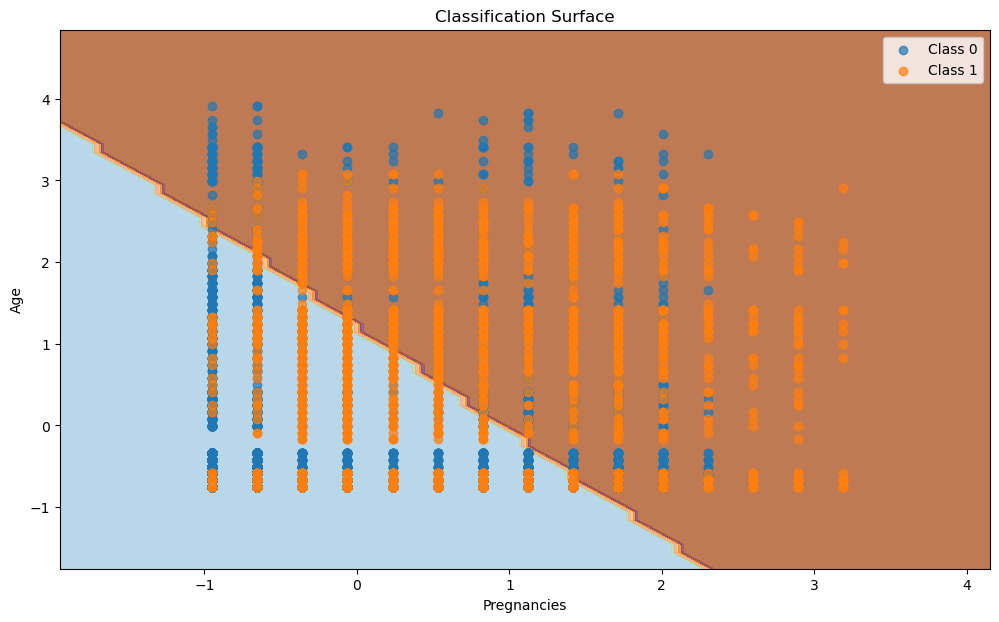

In [1]:
# Importowanie wymaganych bibliotek
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from numpy import where, meshgrid, arange, hstack

# Wczytanie danych
data = pd.read_csv('diabetes.csv')

# Przygotowanie danych
features = ['Pregnancies', 'Age']
target = 'Diabetic'
X, y = data[features], data[target]

# Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0, stratify=y
)

# Standaryzacja danych
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Funkcja do wizualizacji powierzchni decyzyjnej
def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))
    
    # Definiowanie granic siatki
    min1, max1 = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    min2, max2 = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    
    # Tworzenie siatki
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)
    xx, yy = meshgrid(x1grid, x2grid)
    grid = hstack((xx.flatten().reshape(-1, 1), yy.flatten().reshape(-1, 1)))
    
    # Predykcja na siatce
    yhat = trained_model.predict(grid)
    zz = yhat.reshape(xx.shape)
    
    # Wizualizacja granicy decyzyjnej
    plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.8)
    
    # Wykres punktów danych
    for class_value in range(2):
        row_ix = where(y_plot == class_value)
        plt.scatter(
            X_plot[row_ix, 0], X_plot[row_ix, 1],
            label=f"Class {class_value}", alpha=0.7
        )
    
    plt.legend(loc='upper right')
    plt.title("Classification Surface")
    plt.xlabel("Pregnancies")
    plt.ylabel("Age")
    plt.show()

# Testowanie różnych rodzajów regularyzacji i ich stopnia
regularizations = ['l1', 'l2']
C_values = [0.01, 0.1, 1, 10]

for reg in regularizations:
    for C in C_values:
        print(f"\nModel: Logistic Regression (penalty={reg}, C={C})")
        
        # Trenowanie modelu
        model = LogisticRegression(penalty=reg, C=C, solver='liblinear', random_state=0)
        model.fit(X_train_standardized, y_train)
        
        # Obliczenie metryk F1-score
        train_predictions = model.predict(X_train_standardized)
        test_predictions = model.predict(X_test_standardized)
        train_f1 = f1_score(y_train, train_predictions)
        test_f1 = f1_score(y_test, test_predictions)
        
        # Wyświetlenie wyników F1-score
        print(f"F1-score (zbiór treningowy): {train_f1:.4f}")
        print(f"F1-score (zbiór testowy): {test_f1:.4f}")
        
        # Wizualizacja powierzchni decyzyjnej
        plot_classification_surface(X_train_standardized, y_train, model)
